<a href="https://colab.research.google.com/github/thalisrocha/Launch-motion-estimation/blob/main/launch_motion_estimation_Rocha_Pestana_Thalis_checkpoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This practical work, on motion estimation, has 3 different parts, corresponding to three families of algorithms that we have seen in class:
- Block matching algorithms
- Optic flow
- Parametric motion estimation.

You are asked to complete the different algorithms and to try it. Also, please answer to the theoretical questions, in the notebook.

In [ ]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt

# from google.colab import files
# import sys
# from google.colab import drive
# drive.mount('/content/drive')
# sys.path.append('/content/drive/MyDrive/IMA/IMA208/TP1')

from me_ssd import me_ssd
from displayMVF import displayMVF
from fracMc import fracMc
from PSNR import PSNR
from me_sad import me_sad
from HornSchunck import HS
from applyAffineMotion import applyAffineMotion
from angle2D import angle2D
from gradient import gradient


# I - Block matching algorithms
## I-1 - Unregularized algorithms
### I-1-a - Unregularized SSD-based algorithm

First, read the two images 'flower_cif_1.mat' and 'flower_cif_1.mat', which are two consecutive frames of a video sequence. You will have to estimate the motion between these frame, using block matching algorithms.

In [ ]:
im1 = loadmat('/content/drive/MyDrive/IMA/IMA208/TP1/flower_cif_1.mat')['im1']
im1 = im1.astype('float')
im2 = loadmat('/content/drive/MyDrive/IMA/IMA208/TP1/flower_cif_2.mat')['im2']
im2 = im2.astype('float')

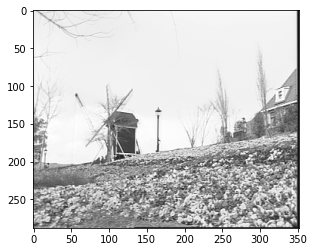

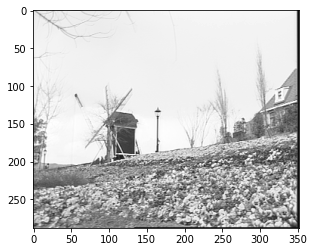

In [ ]:
plt.figure(),plt.imshow(im1,cmap='gray');
plt.figure(),plt.imshow(im2,cmap='gray');

First, you will have to encode a block matching using the SSD criterion. Some default values of the algorithm are given below: the number of column and rows in each block, and the search radius.

In [ ]:
brow = 16 # Number of rows per block
bcol = 16 # Number of columns per block
search_radius = 8 # Search radius

Code the me_ssd function in the me_ssd file. First, implement the unregularized function.

In [ ]:
mvf_ssd,prediction =  me_ssd(im2, im1, brow, bcol, search_radius)

Show the motion vector field using the displayMVF function. Write your remarks. Are there errors? If yes, where and why?

Change the block size and the search area radius. How does it impact your results?

It is possible to observe that there are several erros in homogeneous regions of the sky in the image using the block sizes and search area by default. This occurs because, in homogeneous areas, where the pixel values are very similar, it can be difficult to find the best match, as multiple candidate blocks may give similar SSD values. This can lead to errors in motion estimation, as the wrong candidate block may be selected.

Increasing the block size can help reduce the number of homogeneous areas and minimize errors. With a larger block size, the differences between blocks are more distinct, making it easier to find the best match. Similarly, increasing the search area radius can provide more candidate blocks, increasing the chances of finding a better match and reducing errors.



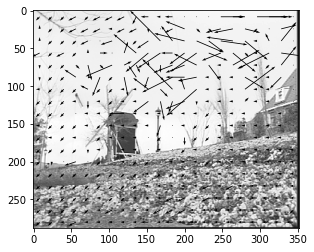

In [ ]:
displayMVF(im1,mvf_ssd,brow)

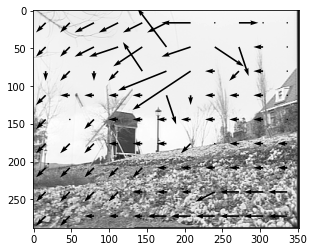

In [ ]:
mvf_ssd2,prediction =  me_ssd(im2, im1, 32, 32, search_radius)
displayMVF(im1,mvf_ssd2,32)

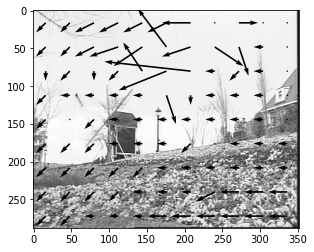

In [ ]:
mvf_ssd3,prediction =  me_ssd(im2, im1, 32, 32, 16)
displayMVF(im1,mvf_ssd3,32)

Motion compensation: now that we have computed the movement vector field, we can compute the motion compensated image. Display the motion compensated image. What can you observe ?

TO DO : code the motion compensation function

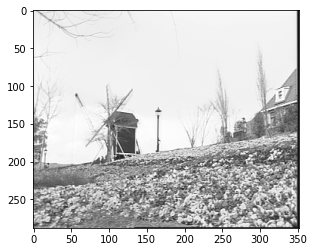

In [ ]:
plt.imshow(im1, cmap="gray")

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.image.AxesImage at 0x7f757cc37850>)

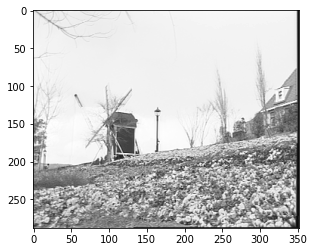

In [ ]:
mc_ssd = fracMc(im1,mvf_ssd)
plt.figure(),plt.imshow(mc_ssd,cmap='gray')

Compute the PSNR between the motion compensated and the current images.

What is the definition of PSNR ? Is the PSNR between the motion-compensated image and im2 better than between im1 and im2 ? Explain why.

Code the PSNR function. Compute it using the BM algorithm results, with different parameter values. Explain what you observe.

**Answer:**

PSNR (Peak Signal-to-Noise Ratio) is a measurement used to evaluate the quality of a compressed or reconstructed image or video compared to the original, uncompressed version. Higher PSNR values indicate better image quality, with a perfect image having a PSNR value of infinity. The expression of PSNR is given by:

$$ PSNR = 10 log_{10}(\frac{d^2}{\frac{1}{mn} || I_{m1}-I_{m2}||})$$

where m and n are the image dimensions and d is the peak signal (255 to an image in 8 bits).

As expected, the PSNR is better between the motion compensated image and im1 than between im1 and im2, since the motion compensated image provide regions that are similar to those in the previous frame (im1), only encoding the differences between these images, while im2 is simply a shifting of the entire im1.



In [ ]:
psnr_ssd = PSNR(im2,mc_ssd)
print(psnr_ssd)

22.706094842153128


In [ ]:
psnr_ssd = PSNR(im2,im1)
print(psnr_ssd)

18.786509322935075


In [ ]:
mc_ssd2 = fracMc(im1,mvf_ssd2)
psnr_ssd = PSNR(im2,mc_ssd2)
print(psnr_ssd)

22.45321364543694


In [ ]:
mc_ssd3 = fracMc(im1,mvf_ssd3)
psnr_ssd = PSNR(im2,mc_ssd3)
print(psnr_ssd)

22.453213877240536


### I-1-b Unregularized SAD-based algorithm
Now, we will use the SAD as a metric for the block matching algorithm. To do that, implement the me_sad algorithm. Please note that you function should be very similar to me_ssd, except for the metric (as such, as a starting point, you can copy paste what you have proposed for me_ssd).

Show the motion vector field using the displayMVF function. Do you see any difference with the SSD ? Explain.

Both SSD and SAD methods present similar result visually. However, SSD presents a better PSNR. Increasing the block size reduced the PSNR but the MVF seems more regular and it is more interpretable.

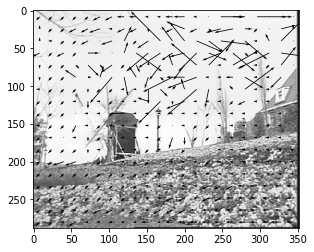

In [ ]:
displayMVF(im1,mvf_sad,brow)

Motion compensation: compute the motion compensated image and display it. In addition, compute the PSNR.

Comment the difference observed between SSD and SAD in terms of regularity of the motion vector field, PSNR of the prediction and impact of the block size.

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.image.AxesImage at 0x7f7589788850>)

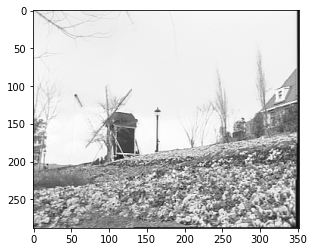

In [ ]:
mc_sad = fracMc(im1,mvf_sad)
plt.figure(),plt.imshow(mc_sad,cmap='gray')

In [ ]:
psnr_sad = PSNR(im2,mc_sad)
print(psnr_sad)

22.624558645110028


22.447170096737704


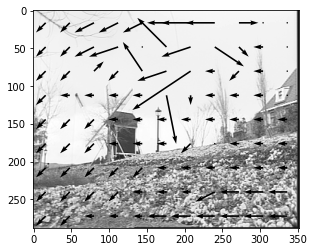

In [ ]:
mvf_sad2,prediction =  me_sad(im2, im1, 32, 32, search_radius)
displayMVF(im1,mvf_sad2,32)

mc_sad2 = fracMc(im1,mvf_sad2)
psnr_sad = PSNR(im2,mc_sad2)
print(psnr_sad)

22.447170096737704


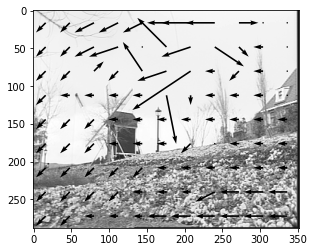

In [ ]:
mvf_sad3,prediction =  me_sad(im2, im1, 32, 32, 16)
displayMVF(im1,mvf_sad3,32)

mc_sad3 = fracMc(im1,mvf_sad3)
psnr_sad = PSNR(im2,mc_sad3)
print(psnr_sad)

## I-2- Regularized algorithms
Now, we will add a regularization term to the metrics (SSD and then SAD) we previously used.
### I-2-1- Regularized SSD-based algorithm

TO DO : code the regularized SSD-based algorithm.
For the sake of simplicity, the regularizing function is already given. How does it work and what does it compute?

Try several parameter values, and compare your results with the unregularized algorithms. What can you observe?

To reduce the impact of noise and improve the robustness of the registration, the Regularized SSD algorithm introduces a regularization term to the cost function. This term imposes a smoothness constraint on the displacement or deformation field, encouraging nearby pixels to have similar values. This regularization term is often expressed as the sum of squared differences between neighboring pixels in the displacement or deformation field. The regularized SSD algorithm then solves for the displacement or deformation field that minimizes the cost function, subject to the regularization constraint.

The regularized result presents a greater PSNR and an image more clear and interpretable.

22.706094842153128


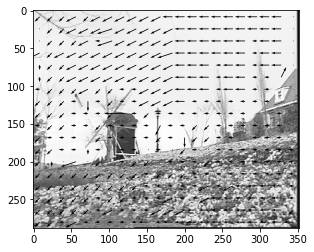

In [ ]:
mvf_ssd_reg, prediction =  me_ssd(im2, im1, brow, bcol, search_radius, lamb=1)
displayMVF(im2, mvf_ssd_reg, 16)
mc_ssd = fracMc(im1,mvf_ssd)
print(PSNR(im2, mc_ssd))

In [ ]:
mvf_ssd_reg, prediction =  me_ssd(im2, im1, brow, bcol, search_radius, lamb=1)
displayMVF(im2, mvf_ssd_reg, 16)
mc_ssd = fracMc(im1,mvf_ssd)
print(PSNR(im2, mc_ssd))

### I-2-2- Regularized SAD-based algorithm

TO DO : code the regularized SAD-based algorithm.

Try several parameter values, and compare your results with the unregularized algorithms and the regularized SSD-based algorithm.

To the regularized SAD the PSNR is a little lower but the vectors are more regular.

22.624558645110028


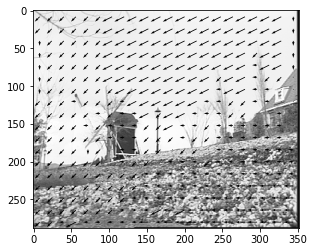

In [ ]:
mvf_sad_reg,prediction =  me_sad(im2, im1, brow, bcol, search_radius, 1)
displayMVF(im2,mvf_sad_reg,16)
mc_ssd = fracMc(im1,mvf_sad_reg)
print(PSNR(im2, mc_sad))

# Optical flow

You will now implement the Horn and Schunck algorithm to estimate the optic flow. The two images we will consider here have a more local movement vector field, since we are considering small movements in a face.

In [ ]:
im1 = loadmat('akiyo_cif1.mat')['im1']
im1 = im1.astype('float')
im2 = loadmat('akiyo_cif2.mat')['im2']
im2 = im2.astype('float')

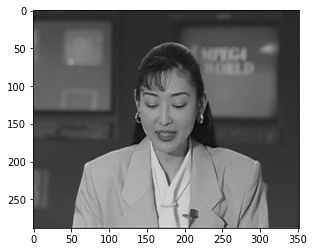

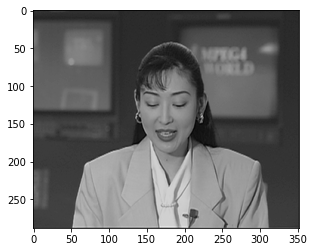

In [ ]:
plt.figure(),plt.imshow(im1,cmap='gray')
plt.figure(),plt.imshow(im2,cmap='gray');

Compute the optical flow by filling the gaps in the Horn and Schunck function. You can use the motion field that you estimated before with the block matching algorithms to initialize you algorithm.

As a reminder, the optical flow is implemented by the iterative Horn and Schunck's algorithm:
$$
u^{n+1} = \bar{u}^n - f_x \frac{\bar{u}^n f_x + \bar{v}^n f_y + f_t}{\alpha^2 + \|\nabla f\|^2}
$$
$$
v^{n+1} = \bar{v}^n - f_y \frac{\bar{u}^n f_x + \bar{v}^n f_y + f_t}{\alpha^2 + \|\nabla f\|^2}
$$
where $u^n$ is the value of the $u$ component at the $n$-th iteration, and $\bar{u}$ is the local average of $u$.

In [ ]:
brow = 16; bcol=16; search_radius =13;

alpha = 100
ite = 100

uInitial = mvf_ssd_reg[:, :, 1] # Rem: pay attention to the inversion of the order compare to me_ssd.
vInitial = mvf_ssd_reg[:, :, 0]
[u, v] = HS(im2, im1, uInitial, vInitial, alpha, ite,blur=1.)

Display the motion field and compute the PSNR. Do you observe any improvement compare to block-matching algorithms? Explain. You can test on both the Akiyo and Flowers images.

It is possible to observe that even in homogeneous regions the algorithm behaves well. Globally, the result is smoother.

Some points that may pose difficulties in this method are the choice of the parameter alpha and the computational cost that is greater.

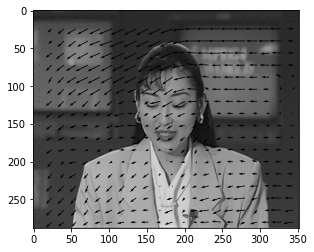

In [ ]:
mvf_hs = np.zeros((np.shape(v)[0],np.shape(v)[1],2))
mvf_hs[:,:,0] = v
mvf_hs[:,:,1] = u
displayMVF(im1,mvf_hs,16)

mc_hs = fracMc(im1,mvf_hs)
psnr_hs = PSNR(im2,mc_hs)

In [ ]:
psnr_hs

30.2558334809531

## End of TP 1

# III - Parametric estimation
In this last part, we will work on parametric estimation, both using direct and indirect methods.
## III-1- Direct parametric estimation
### III-1-1 Theoretical questions

**Infinite signal**

Let $a: (n,m)\in \mathbb{Z}^2 \rightarrow \mathbb{R}$ be a bi-dimensional signal and $b(n,m)$ a signal of the same type.

Recall the expression of the 2D discrete time Fourier transform (DTFT).

Let us suppose that
$\exists c,d \in \mathbb{Z}^2: \forall n,m \in \mathbb{Z}^2,b(n,m) = a(n+c,m+d)$ (that is, $b$ is a translation of $a$). Compute the DTFT of $b$ as a function of the one of $a$ and of the displacement $(c,d)$.

Show that the ratio between the DTFTs is:
$$
\frac{\hat{b}(\nu_x,\nu_y)}{\hat{a}(\nu_x,\nu_y)} = \exp(i2\pi (c\nu_x + d \nu_y))
$$

**Answer:**

The expression of the 2D DTFT is given by:

$$ F(\nu_x,\nu_y) = \sum_{x=- ∞}^{∞} \sum_{y=-∞}^{∞} f(x,y) e^{-i2 \pi (\nu_xx + \nu_yy)}  $$

It can be shown, using the Discrete Fourier Transform, that the Fourier Transform sastifies the following property:

$ $
$$ f(x−c,y−d)⟺F(\nu_x,\nu_y)e^{-i2π(c \nu_x + d \nu_y)} $$
$ $

Hence:

$$ \frac{\hat{b}(\nu_x,\nu_y)}{\hat{a}(\nu_x,\nu_y)} = \frac{\hat{a}(\nu_x,\nu_y)e^{-i2π(c \nu_x + d \nu_y)}}{\hat{a}(\nu_x,\nu_y)}  $$

$$ \frac{\hat{b}(\nu_x,\nu_y)}{\hat{a}(\nu_x,\nu_y)} = e^{-i2π(c \nu_x + d \nu_y)} $$



**Finite signal**

Now, $a: (n,m) \in \{0,1,...,N-1\}^2 \rightarrow \mathbb{R}$ and $b(n,m)$ are both finite signals. In that case, we use the Discrete Fourier Transform (DFT) rather than the DTFT.

Recall the expression of the DF.

Under which hypotheses is the ratio between $a$'s and $b$'s DFT a linear phase signal:
$$
\frac{\hat{A}(k_x,k_y)}{\hat{B}(k_x,k_y)} = \exp\left(\frac{2i\pi(ck_x + dk_y)}{N^2}\right)
$$

**Answer:**

The expression of the DFT is given by:

$$ F(\nu_x,\nu_y) = \frac{1}{mn} \sum_{x=0}^{n-1} \sum_{y=0}^{m-1} f(x,y) e^{-i2 \pi (\frac{\nu_xx}{m} + \frac{\nu_yy}{n})}  $$

In an analogous way the translation property is satisfied as below:

$ $
$$ f(x−c,y−d)⟺F(\nu_x,\nu_y)e^{-i2π\frac{(c \nu_x n + d \nu_y m)}{mn}} $$
$ $

Hence:

$$\frac{\hat{A}(k_x,k_y)}{\hat{B}(k_x,k_y)} = e^{-i2π\frac{(c \nu_x n + d \nu_y m)}{mn}}$$

When $ m = n$ and the translation $c$ and $d$ are small enough:

$$
\frac{\hat{A}(k_x,k_y)}{\hat{B}(k_x,k_y)} = \exp\left(\frac{2i\pi(ck_x + dk_y)}{N^2}\right)
$$

$$ $$

### III-1-2 Practical part
First, start to work on the 'ball.mat' image. We will apply a translation to this image and try to estimate the parameter of the translation.

Try by either adding of not some noise into the image.

In [ ]:
im1 = loadmat('ball.mat')['im1']
im1 = im1.astype('float')

#im1 = loadmat('lena.mat')['im1']
#im1 = im1.astype('float')

N, M = np.shape(im1)

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.image.AxesImage at 0x7f7587548c70>)

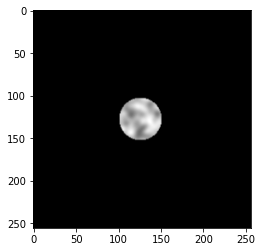

In [ ]:
# Potentially add noise to the image
sigma = 0
im1 = im1 + sigma*np.random.randn(np.shape(im1)[0],np.shape(im1)[1])
plt.figure(),plt.imshow(im1,cmap='gray')

In the following, we apply a translation to the image.

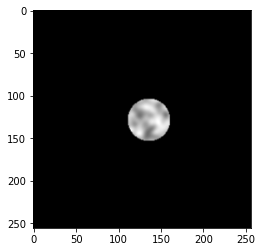

In [ ]:
horiz_displacement = 10.
vert_displacement  = 1.
b = np.array([ horiz_displacement, vert_displacement])

# We could also use an affine motion matrix
#B = np.zeros((2,2))

im2 = applyAffineMotion(im1,b)
plt.figure(),plt.imshow(im2,cmap='gray');

Compute the FFT of the two images. Using the indications given in the theroretical part, describe a method with which you can find the parameters of the translation from the two FFTs.

**Answer:** From the theoretical part, it is possible to observe that the translation does not have any effect on the magnitude of the Fourier Transform, only on the phase.

Therefore, it is possible to find the parameters of the translation analysing the phase angle obtained from the ratio between the image and the translated image.



In [ ]:
IM1 = np.fft.fft2(im1)
IM2 = np.fft.fft2(im2)

In [ ]:
phi = angle2D(IM1/IM2)

Display phi. Is it a linear plane and why?

As it is possible to observe, phi is a linear plane because the projection of the plane described by the phase angles on the z coordinate describes a linear function.

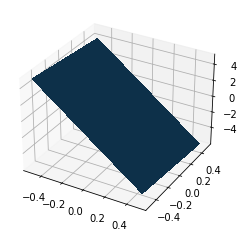

In [ ]:
fx, fy = np.meshgrid(np.arange(-(M-1)/2,(M-1)/2+1)/M, np.arange(-(N-1)/2,(N-1)/2+1)/N)
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(fx, fy, phi, linewidth=0, antialiased=False)

Translation estimation: to estimate the parameters of the translation, we are now looking for the slope of the plane.

Method 1: estimate it using the median of the gradient. To do that, complete the gradient function.

In [ ]:
gx, gy = gradient(phi,1/M,1/N)
GX = np.median(gx)
GY = np.median(gy)

In [ ]:
print(GX)
print(GY)

-10.0
-1.0


Method 2: the code below computes the least Square planar approximation of phi, enabling you how to estimate the parameters of the translation. Explain how it works.

In [ ]:
import numpy as np
import cv2
from scipy.ndimage import median_filter

#%%
def medianFilter(img, kernel_size):
    """
    Applies a median filter to the image

    Parameters
    ----------
    img : np.array
        Image to be filtered.
    kernel_size : int
        Size of the kernel.

    Returns
    -------
    img_filt : np.array
        Filtered image.

    """
    img_filt = median_filter(img, size = kernel_size)

    return img_filt


In [ ]:
phi = phi-phi[int(N/2+2), int(M/2+2)]
t = medianFilter(phi,1)

In [ ]:
A = np.zeros((np.shape(fx)[0]*np.shape(fx)[1],2))
A[:,0] = fx.reshape(np.shape(fx)[0]*np.shape(fx)[1])
A[:,1] = fy.reshape(np.shape(fy)[0]*np.shape(fy)[1])
b = t.reshape(np.shape(t)[0]*np.shape(t)[1])
bEst = np.dot(np.linalg.pinv(A),b)

In [ ]:
print(bEst)

[-10.  -1.]


Relaunch the above code:
- with and without noise
- with the lena image, instead of the ball image.

Each time, are you able to correctly estimate the translation? Why? Comment your results.

**Answer:** Concerning the result of the ball.mat image without noise both methods were capable to perfectly estimate the translation.

Concerning the same image with a noise with sigma = 5, both methods presented a worse result, as expected. In the phase correlation method the addition of a random noise produces false peaks and introduces high-frequency components which can lead to incorrect translation estimates and distort the phase correlation making more difficulty to accurately estimate the translation parameter. In the second method, the application of the median filter softens the effects of noise, but the results are still affected.

Finally, the lena.mat image without noise presents the worst results, mainly in the second method. This occurs probably because this image presents various contours and intensity variation and, as a consequence, when the median filter is applied some pixel intensities are changed.



### III-1-2 Practical part **(with noise)**

In [ ]:
im1 = loadmat('ball.mat')['im1']
im1 = im1.astype('float')

#im1 = loadmat('lena.mat')['im1']
#im1 = im1.astype('float')

N, M = np.shape(im1)

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.image.AxesImage at 0x7f757d18b280>)

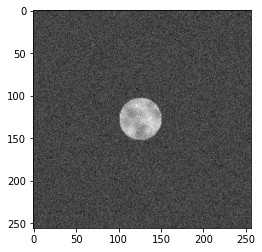

In [ ]:
# Potentially add noise to the image
sigma = 20
im1 = im1 + sigma*np.random.randn(np.shape(im1)[0],np.shape(im1)[1])
plt.figure(),plt.imshow(im1,cmap='gray')

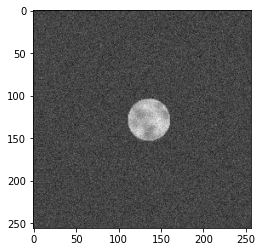

In [ ]:
horiz_displacement = 10.
vert_displacement  = 1.
b = np.array([ horiz_displacement, vert_displacement])

# We could also use an affine motion matrix
#B = np.zeros((2,2))

im2 = applyAffineMotion(im1,b)
plt.figure(),plt.imshow(im2,cmap='gray');

In [ ]:
IM1 = np.fft.fft2(im1)
IM2 = np.fft.fft2(im2)

In [ ]:
phi = angle2D(IM1/IM2)

(256, 256)
(256, 256)
(256, 256)
(256, 256)
[[-62.83185307 -62.58391003 -62.33932667 ...  -0.73788112  -0.4925264
   -0.24794304]
 [-56.5304656  -56.27428737 -56.04303958 ...  -0.7012153   -0.47195458
   -0.21145235]
 [-62.77658438 -62.54003701 -62.28368909 ...  -0.70093721  -0.43540111
   -0.20666953]
 ...
 [-56.62017911 -56.38252283 -56.1323917  ...   5.47118735   5.72491643
    5.96541714]
 [-56.60393646 -56.34199823 -56.11326666 ...   5.50218851   5.73502133
    5.99136924]
 [-50.28368462 -50.0540301  -49.79352787 ...   5.51359008   5.77755713
    6.00880491]]


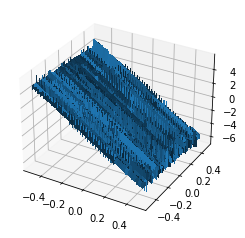

In [ ]:
fx, fy = np.meshgrid(np.arange(-(M-1)/2,(M-1)/2+1)/M, np.arange(-(N-1)/2,(N-1)/2+1)/N)
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(fx, fy, phi, linewidth=0, antialiased=False)

In [ ]:
gx, gy = gradient(phi,1/M,1/N)
GX = np.median(gx)
GY = np.median(gy)

In [ ]:
print(GX)
print(GY)

-9.877067677832883
-1.5226964211964287


In [ ]:
import numpy as np
import cv2
from scipy.ndimage import median_filter

#%%
def medianFilter(img, kernel_size):
    """
    Applies a median filter to the image

    Parameters
    ----------
    img : np.array
        Image to be filtered.
    kernel_size : int
        Size of the kernel.

    Returns
    -------
    img_filt : np.array
        Filtered image.

    """
    img_filt = median_filter(img, size = kernel_size)

    return img_filt


In [ ]:
phi = phi-phi[int(N/2+2), int(M/2+2)]
t = medianFilter(phi,1)

In [ ]:
A = np.zeros((np.shape(fx)[0]*np.shape(fx)[1],2))
A[:,0] = fx.reshape(np.shape(fx)[0]*np.shape(fx)[1])
A[:,1] = fy.reshape(np.shape(fy)[0]*np.shape(fy)[1])
b = t.reshape(np.shape(t)[0]*np.shape(t)[1])
bEst = np.dot(np.linalg.pinv(A),b)

In [ ]:
print(bEst)

[-9.4349552  -0.95166673]


### III-1-2 Practical part **(with lena.mat)**

In [ ]:
im1 = loadmat('lena.mat')['im1']
im1 = im1.astype('float')

#im1 = loadmat('lena.mat')['im1']
#im1 = im1.astype('float')

N, M = np.shape(im1)

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.image.AxesImage at 0x7f757c8f3ac0>)

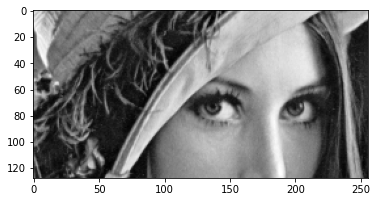

In [ ]:
# Potentially add noise to the image
sigma = 0
im1 = im1 + sigma*np.random.randn(np.shape(im1)[0],np.shape(im1)[1])
plt.figure(),plt.imshow(im1,cmap='gray')

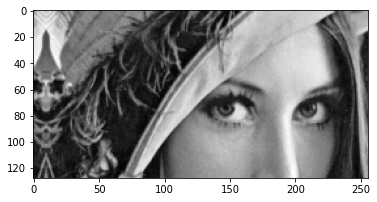

In [ ]:
horiz_displacement = 10.
vert_displacement  = 1.
b = np.array([ horiz_displacement, vert_displacement])

# We could also use an affine motion matrix
#B = np.zeros((2,2))

im2 = applyAffineMotion(im1,b)
plt.figure(),plt.imshow(im2,cmap='gray');

In [ ]:
IM1 = np.fft.fft2(im1)
IM2 = np.fft.fft2(im2)

In [ ]:
phi = angle2D(IM1/IM2)

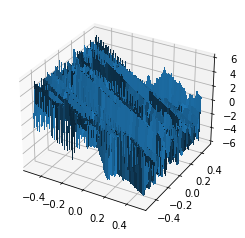

In [ ]:
fx, fy = np.meshgrid(np.arange(-(M-1)/2,(M-1)/2+1)/M, np.arange(-(N-1)/2,(N-1)/2+1)/N)
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(fx, fy, phi, linewidth=0, antialiased=False)

In [ ]:
gx, gy = gradient(phi,1/M,1/N)
GX = np.median(gx)
GY = np.median(gy)

In [ ]:
print(GX)
print(GY)

-9.138933184354158
-2.0412481001040206


In [ ]:
import numpy as np
import cv2
from scipy.ndimage import median_filter

#%%
def medianFilter(img, kernel_size):
    """
    Applies a median filter to the image

    Parameters
    ----------
    img : np.array
        Image to be filtered.
    kernel_size : int
        Size of the kernel.

    Returns
    -------
    img_filt : np.array
        Filtered image.

    """
    img_filt = median_filter(img, size = kernel_size)

    return img_filt


In [ ]:
phi = phi-phi[int(N/2+2), int(M/2+2)]
t = medianFilter(phi,1)

In [ ]:
A = np.zeros((np.shape(fx)[0]*np.shape(fx)[1],2))
A[:,0] = fx.reshape(np.shape(fx)[0]*np.shape(fx)[1])
A[:,1] = fy.reshape(np.shape(fy)[0]*np.shape(fy)[1])
b = t.reshape(np.shape(t)[0]*np.shape(t)[1])
bEst = np.dot(np.linalg.pinv(A),b)

In [ ]:
print(bEst)

[-7.56783721  0.14970607]


# III-2-Indirect parametric estimation
In this last part, we will perform indirect parametric estimation. The movement vector field will be estimated by 1) block matching; 2) optic flow. Each time, you will then estimate the translation by taking the median of the estimated vector field.

Perform the experiment without and with noise (you can then take sigma = 2).

Finally, compare all the parametric estimation methods when the translation values are not integer.

10.0
2.0


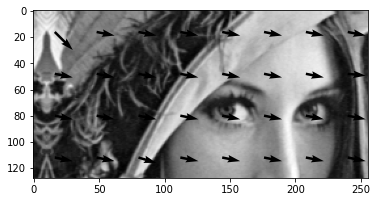

In [ ]:
lamb = 0
mvf,prediction = me_ssd(im2,im1,32,32,10,lamb)
displayMVF(im2,mvf,32)
mvf_x = mvf[:,:,1]
mvf_y = mvf[:,:,0]
bx = np.median(mvf_x)
by = np.median(mvf_y)
print(bx)
print(by)

Block matching with noise and non integer translation

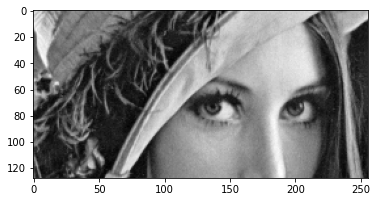

In [ ]:
im1 = loadmat('lena.mat')['im1']
im1 = im1.astype('float')

#im1 = loadmat('lena.mat')['im1']
#im1 = im1.astype('float')

N, M = np.shape(im1)

# Potentially add noise to the image
sigma = 2
im1 = im1 + sigma*np.random.randn(np.shape(im1)[0],np.shape(im1)[1])
plt.figure(),plt.imshow(im1,cmap='gray');

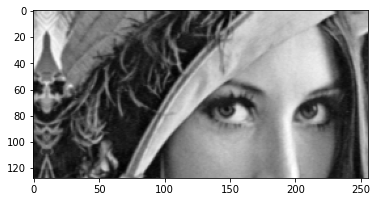

In [ ]:
horiz_displacement = 10.5
vert_displacement  = 1.9
b = np.array([ horiz_displacement, vert_displacement])

# We could also use an affine motion matrix
#B = np.zeros((2,2))

im2 = applyAffineMotion(im1,b)
plt.figure(),plt.imshow(im2,cmap='gray');

10.0
2.0


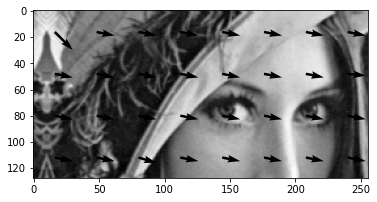

In [ ]:
lamb = 0
mvf,prediction = me_ssd(im2,im1,32,32,10,lamb)
displayMVF(im2,mvf,32)
mvf_x = mvf[:,:,1]
mvf_y = mvf[:,:,0]
bx = np.median(mvf_x)
by = np.median(mvf_y)
print(bx)
print(by)

Estimation with optic flow

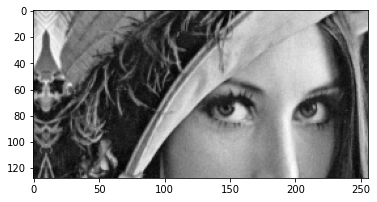

In [ ]:
horiz_displacement = 10.
vert_displacement  = 1.
b = np.array([ horiz_displacement, vert_displacement])

# We could also use an affine motion matrix
#B = np.zeros((2,2))

im2 = applyAffineMotion(im1,b)
plt.figure(),plt.imshow(im2,cmap='gray');

4.531116936880968
1.0898246582222255


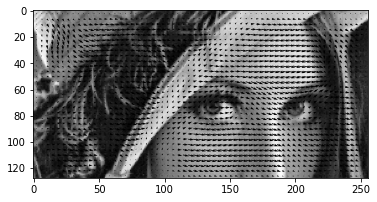

In [ ]:
alpha = 100
ite = 100
uInitial = mvf[:,:,1]
vInitial = mvf[:,:,0]
u, v = HS(im2, im1, uInitial, vInitial, alpha, ite)
mvf_hs = np.zeros((np.shape(v)[0],np.shape(v)[1],2))
mvf_hs[:,:,0] = v
mvf_hs[:,:,1] = u
displayMVF(im1,mvf_hs,4)
bx = np.median(u)
by = np.median(v)
print(bx)
print(by)

Estimation with optic flow, noise and non integer translation

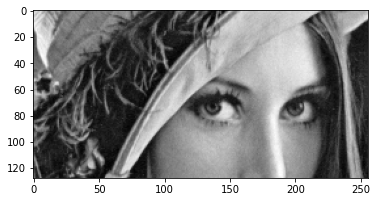

In [ ]:
im1 = loadmat('lena.mat')['im1']
im1 = im1.astype('float')

#im1 = loadmat('lena.mat')['im1']
#im1 = im1.astype('float')

N, M = np.shape(im1)

# Potentially add noise to the image
sigma = 2
im1 = im1 + sigma*np.random.randn(np.shape(im1)[0],np.shape(im1)[1])
plt.figure(),plt.imshow(im1,cmap='gray');

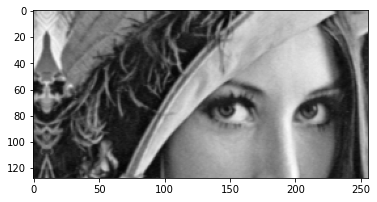

In [ ]:
horiz_displacement = 10.5
vert_displacement  = 1.9
b = np.array([ horiz_displacement, vert_displacement])

# We could also use an affine motion matrix
#B = np.zeros((2,2))

im2 = applyAffineMotion(im1,b)
plt.figure(),plt.imshow(im2,cmap='gray');

4.858852483648553
1.1169655155711866


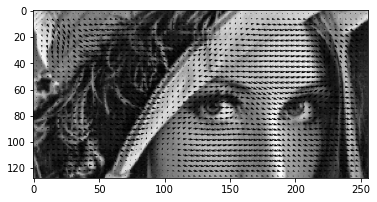

In [ ]:
alpha = 100
ite = 100
uInitial = mvf[:,:,1]
vInitial = mvf[:,:,0]
u, v = HS(im2, im1, uInitial, vInitial, alpha, ite)
mvf_hs = np.zeros((np.shape(v)[0],np.shape(v)[1],2))
mvf_hs[:,:,0] = v
mvf_hs[:,:,1] = u
displayMVF(im1,mvf_hs,4)
bx = np.median(u)
by = np.median(v)
print(bx)
print(by)